## Program for Comparing Q-Learning and SARSA

**Install packages**

In [1]:
!pip install gymnasium matplotlib numpy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.2 MB/s eta 0:00:00


**Import Packages**

In [2]:
import gymnasium as gym
import numpy as np
import random
import matplotlib.pyplot as plt

Creates the Taxi-v3 environment. The agent controls a taxi in a gridworld, with the objective of picking up and dropping off passengers at designated locations.

In [3]:
# Create the FrozenLake environment
env = gym.make('Taxi-v3')

**alpha: **The learning rate, which determines how much new information overrides old information.<br>
**gamma:**The discount factor, which balances the importance of immediate and future rewards.<br>
**epsilon:**The exploration rate for the epsilon-greedy policy.<br>
**episodes:** The number of training episodes.<br>
**max_steps:**The maximum number of steps per episode.<br>

In [4]:
# Hyperparameters
alpha = 0.1  # Learning rate
gamma = 0.99  # Discount factor
epsilon = 0.1  # Epsilon for exploration
episodes = 1000  # Number of episodes
max_steps = 100  # Max steps per episode

Chooses an action using an epsilon-greedy strategy: with probability epsilon, choose a random action (explore); otherwise, choose the action with the highest Q-value (exploit).

In [5]:
# Helper function to choose action using epsilon-greedy policy
def epsilon_greedy_policy(Q, state, epsilon):
    if random.uniform(0, 1) < epsilon:
        return env.action_space.sample()  # Explore
    else:
        return np.argmax(Q[state])  # Exploit

Initializes the Q-table and updates it using the Q-Learning update rule:<br>
Q(s,a)=Q(s,a)+α(r+γmax⁡Q(s′,a′)−Q(s,a))<br>
Accumulates rewards for each episode and returns the list of rewards and the Q-table.<br>

In [6]:
# Q-Learning algorithm
def q_learning():
    Q = np.zeros([env.observation_space.n, env.action_space.n])  # Initialize Q-table
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        total_reward = 0

        for _ in range(max_steps):
            action = epsilon_greedy_policy(Q, state, epsilon)
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward

            # Update Q-table using the Q-Learning formula
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * np.max(Q[next_state]) - Q[state, action])

            state = next_state
            if done:
                break

        rewards.append(total_reward)

    return rewards, Q

Similar to Q-Learning but updates using the SARSA formula:<br>
Q(s,a)=Q(s,a)+α(r+γQ(s′,a′)−Q(s,a))<br>
This includes the action chosen in the next state, which aligns with the agent's current policy.<br>

In [7]:
# SARSA algorithm
def sarsa():
    Q = np.zeros([env.observation_space.n, env.action_space.n])  # Initialize Q-table
    rewards = []

    for episode in range(episodes):
        state, _ = env.reset()
        action = epsilon_greedy_policy(Q, state, epsilon)
        total_reward = 0

        for _ in range(max_steps):
            next_state, reward, done, _, _ = env.step(action)
            total_reward += reward
            next_action = epsilon_greedy_policy(Q, next_state, epsilon)

            # Update Q-table using the SARSA formula
            Q[state, action] = Q[state, action] + alpha * (reward + gamma * Q[next_state, next_action] - Q[state, action])

            state = next_state
            action = next_action

            if done:
                break

        rewards.append(total_reward)

    return rewards, Q

Runs both algorithms and plots the rewards over episodes. The rewards are smoothed using a moving average for better visualization.

In [8]:
# Run both algorithms
q_learning_rewards, q_table = q_learning()
sarsa_rewards, sarsa_table = sarsa()

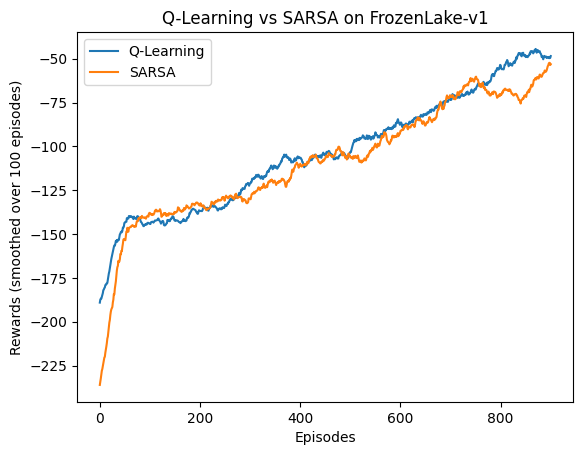

In [9]:
# Plot the rewards comparison
plt.plot(np.convolve(q_learning_rewards, np.ones(100)/100, mode='valid'), label='Q-Learning')
plt.plot(np.convolve(sarsa_rewards, np.ones(100)/100, mode='valid'), label='SARSA')
plt.xlabel('Episodes')
plt.ylabel('Rewards (smoothed over 100 episodes)')
plt.title('Q-Learning vs SARSA on FrozenLake-v1')
plt.legend()
plt.show()